In [15]:
import PySpice
import PySpice.DeviceLibrary
import PySpice.Doc
import PySpice.Doc.ExampleTools
import sympy
import tqdm

# # Custom Imports
# from macanalog_symbolix.filter import Filter_Classifier
# from macanalog_symbolix.domains import Filter_Classification, Circuit

In [3]:
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit

net_filename = "simple_highpass"

# Load the netlist
circuit = Circuit.from_netlist_file(f'../../schematics/netlists/{net_filename}.net')

# Simulate the circuit
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(V1=slice(0, 5, 0.1))  # Example DC analysis

# Process the results
for node in analysis.nodes.values():
    print(f"{node}: {float(node):.3f} V")


AttributeError: type object 'Circuit' has no attribute 'from_netlist_file'

TypeError: SinusoidalVoltageSource.__init__() missing 3 required positional arguments: 'name', 'node_plus', and 'node_minus'

Should be unit less


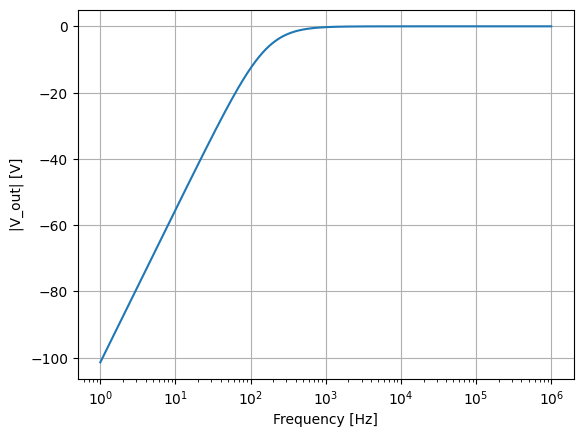

In [26]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import u_V, u_Ohm, u_F, u_Hz
from matplotlib.pyplot import semilogx, xlabel, ylabel, grid, show

import numpy as np

# Define the low-pass filter circuit
circuit = Circuit('Low-Pass Filter')
circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=1 @ u_V)  # AC source
circuit.C(1, 'input', 'output', 1e-6 @ u_F)  # 1 uF capacitor
circuit.R(1, 'output', circuit.gnd, 1e3 @ u_Ohm)  # 1 kOhm resistor


# Simulate the circuit
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(variation='dec', start_frequency=1 @ u_Hz, stop_frequency=1e6 @ u_Hz, number_of_points=100)

# Plot the results
semilogx(analysis.frequency, 20*np.log(abs(analysis['output'])))  # Magnitude of the output voltage
xlabel('Frequency [Hz]')
ylabel('|V_out| [V]')
grid()
show()


In [47]:
val = 1 @ u_pV
val.scale

1e-12

1

In [28]:
print(circuit)


.title Low-Pass Filter
V1 input 0 DC 0V AC 1V SIN(0V 1V 50Hz 0s 0Hz)
C1 input output 1e-06
R1 output 0 1000.0Ohm



In [13]:
print("Available nodes:", list(analysis.nodes.keys()))
for node in analysis.nodes.keys():
    print(f"{node}: {int2(abs(analysis[node]))}")


Available nodes: ['output', 'input']
output: 
input: 
